Задание
1. Используя датасет dataset1.cvs, проведите предобработку данных. Визуализируйте их.
2. Реализуйте алгоритм кластеризации методом ближайшего соседа, методом дальнего
соседа.
3. Проведите разбиение на кластеры, выбрав в качестве метрики качества функционалы,
перечиленные выше. Визуализируйте полученный результат.
4. Определите тип распределения в каждом кластере.

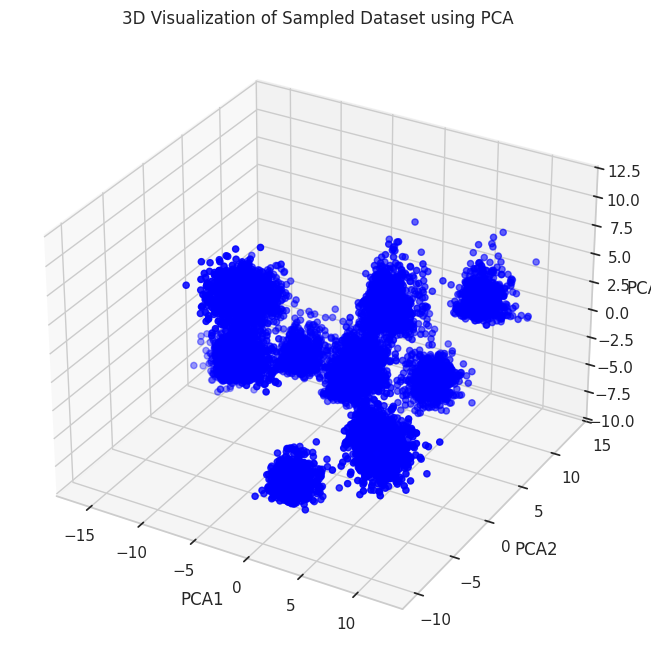

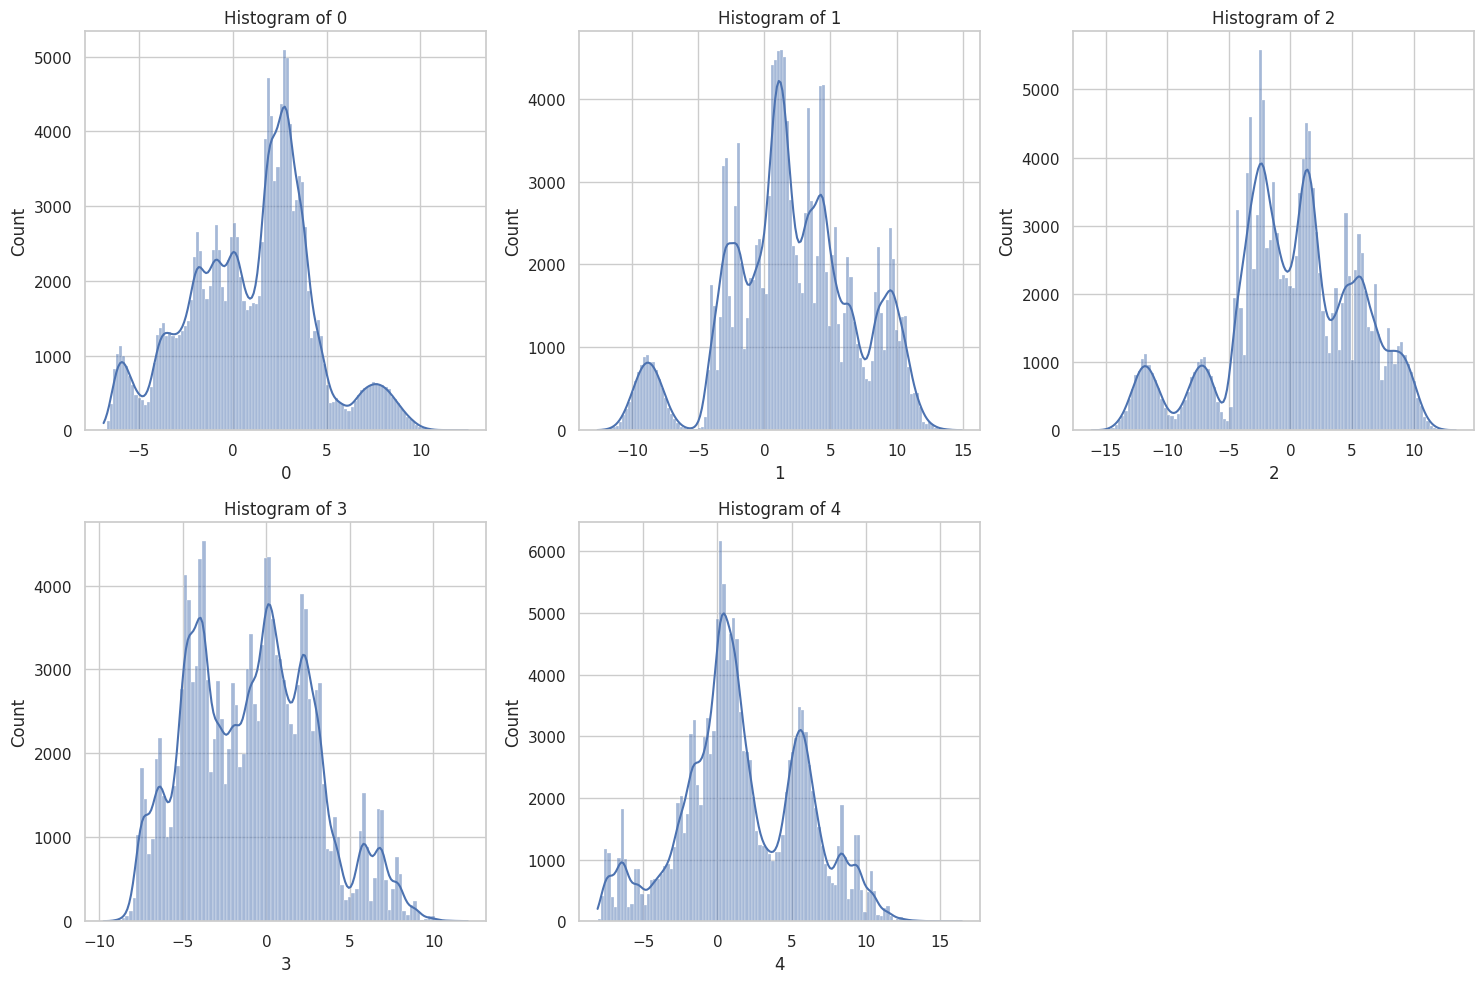

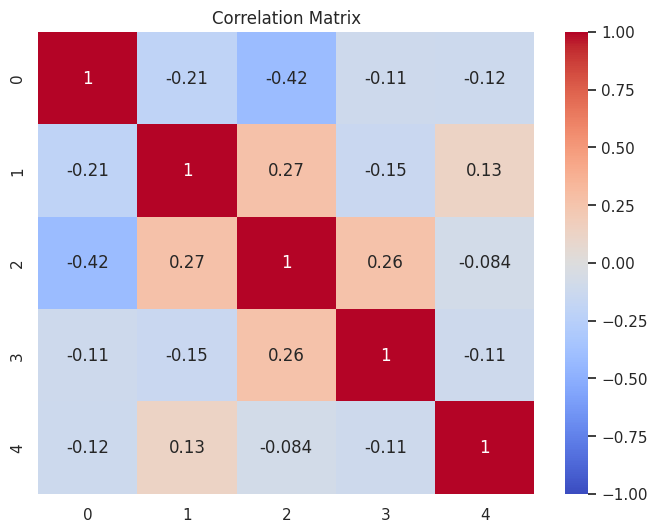

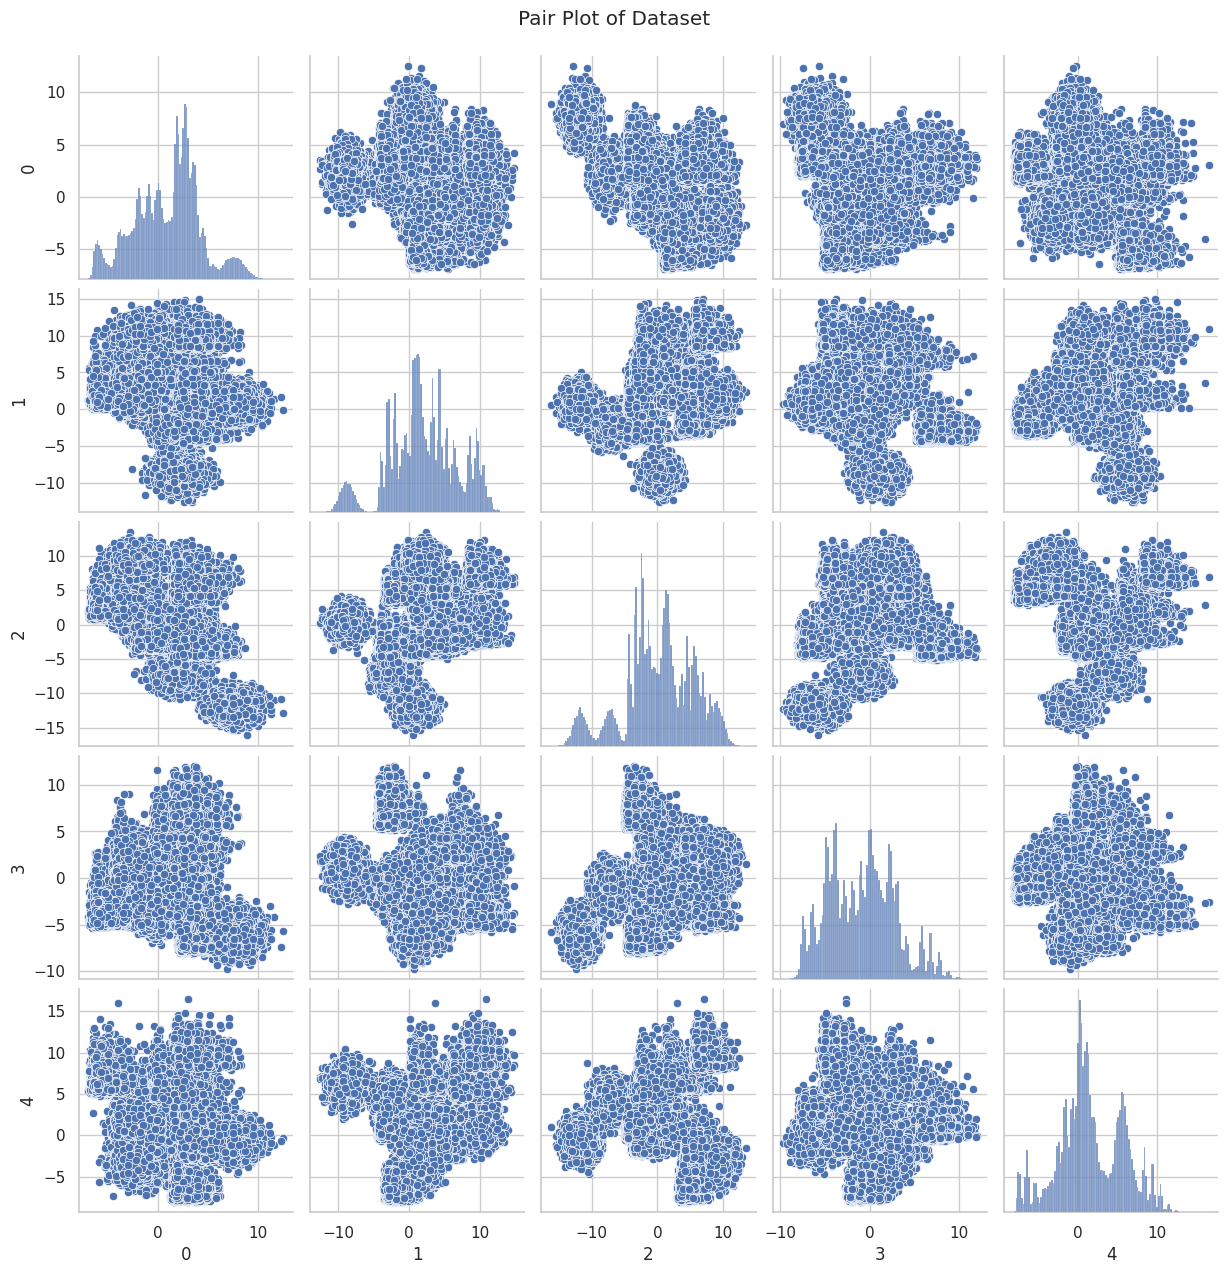

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns

# Загрузка данных из CSV файла
df = pd.read_csv('dataset1.csv', header=None)
df.columns = ['index', '0', '1', '2', '3', '4']
df = df.drop(columns=['index'])  # если индекс не нужен

# Преобразование данных в массив numpy
data = df.values

# Уменьшение размера выборки до 10000 точек (можно изменить количество)
sample_size = 10000
np.random.seed(42)  # Для воспроизводимости результатов
indices = np.random.choice(data.shape[0], sample_size, replace=False)
sampled_data = data[indices]

# Применение PCA для снижения размерности до 3D
pca = PCA(n_components=3)
pca_result = pca.fit_transform(sampled_data)

# Преобразование результата PCA обратно в DataFrame для удобства
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2', 'PCA3'])

# Создание 3D графика
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Построение точек на графике
ax.scatter(pca_df['PCA1'], pca_df['PCA2'], pca_df['PCA3'], c='blue', marker='o')

# Настройка меток осей
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

# Добавление заголовка
plt.title('3D Visualization of Sampled Dataset using PCA')

# Отображение графика
plt.show()

# Создание гистограмм для каждого столбца
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

# Вычисление матрицы корреляции
correlation_matrix = df.corr()

# Визуализация матрицы корреляции с помощью тепловой карты
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Визуализация парных диаграмм
sns.pairplot(df)
plt.suptitle('Pair Plot of Dataset', y=1.02)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np

# Загрузка данных из CSV файла
df = pd.read_csv('dataset1.csv', header=None)
df.columns = ['index', '0', '1', '2', '3', '4']
df = df.drop(columns=['index'])

# Настройка стиля графиков
sns.set(style="whitegrid")

# Преобразование  в  numpy
data = df.values

# Уменьшение размера выборки до 10000 точек
sample_size = 10000
np.random.seed(42)  # Для воспроизводимости результатов
indices = np.random.choice(data.shape[0], sample_size, replace=False)
sampled_data = data[indices]

# Преобразование уменьшенной выборки обратно в DataFrame для визуализации
sampled_df = pd.DataFrame(sampled_data, columns=['0', '1', '2', '3', '4'])

# Визуализация для новой выборки
# Гистограммы для каждого столбца
plt.figure(figsize=(15, 10))
for i, column in enumerate(sampled_df.columns):
    plt.subplot(2, 3, i + 1)  # 2 строки и 3 столбца для подграфиков
    sns.histplot(sampled_df[column], kde=True)
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

# Парные диаграммы для новой выборки
sns.pairplot(sampled_df)
plt.suptitle('Pair Plot of Sampled Dataset', y=1.02)
plt.show()

# Метод ближайшего соседа (Single Linkage)
single_linkage = linkage(sampled_data, method='single')

# Построение дендрограммы для Single Linkage
plt.figure(figsize=(10, 7))
dendrogram(single_linkage)
plt.title('Dendrogram (Single Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Метод дальнего соседа (Complete Linkage)
complete_linkage = linkage(sampled_data, method='complete')

# Построение дендрограммы для Complete Linkage
plt.figure(figsize=(10, 7))
dendrogram(complete_linkage)
plt.title('Dendrogram (Complete Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Функция для оценки качества кластеризации
def evaluate_clustering(data, labels):
    silhouette = silhouette_score(data, labels)
    calinski_harabasz = calinski_harabasz_score(data, labels)
    davies_bouldin = davies_bouldin_score(data, labels)
    return silhouette, calinski_harabasz, davies_bouldin

# Проведение кластеризации и оценка качества для различных значений k
results = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(sampled_data)

    silhouette, calinski_harabasz, davies_bouldin = evaluate_clustering(sampled_data, labels)
    results.append((k, silhouette, calinski_harabasz, davies_bouldin))

# Вывод результатов
print("K, Silhouette Score, Calinski-Harabasz Score, Davies-Bouldin Score")
for result in results:
    print(f"{result[0]}, {result[1]:.4f}, {result[2]:.4f}, {result[3]:.4f}")

# Выбор оптимального числа кластеров (например, по максимальному значению Silhouette Score)
optimal_k = max(results, key=lambda x: x[1])[0]
print(f"Оптимальное число кластеров (по Silhouette Score): {optimal_k}")

# Кластеризация с оптимальным числом кластеров
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(sampled_data)

# Добавление меток кластеров в DataFrame
sampled_df['Cluster'] = labels

# Визуализация парных диаграмм с цветовой дифференциацией по кластерам
sns.pairplot(sampled_df, hue='Cluster', palette='Set1')
plt.suptitle('Pair Plot of Sampled Dataset with Clusters', y=1.02)
plt.show()

# Визуализация гистограмм для каждого столбца с цветовой дифференциацией по кластерам
plt.figure(figsize=(15, 10))
for i, column in enumerate(sampled_df.columns[:-1]):  # Исключаем столбец 'Cluster'
    plt.subplot(2, 3, i + 1)  # 2 строки и 3 столбца для подграфиков
    for cluster in range(optimal_k):
        sns.histplot(sampled_df[sampled_df['Cluster'] == cluster][column], label=f'Cluster {cluster}', kde=True)
    plt.title(f'Histogram of {column}')
    plt.legend()

plt.tight_layout()
plt.show()

# Визуализация каждого кластера отдельно
for cluster in range(optimal_k):
    cluster_data = sampled_df[sampled_df['Cluster'] == cluster].drop(columns=['Cluster'])

    # Гистограммы для каждого столбца в кластере
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(cluster_data.columns):
        plt.subplot(2, 3, i + 1)
        sns.histplot(cluster_data[column], kde=True)
        plt.title(f'Histogram of {column} in Cluster {cluster}')
    plt.tight_layout()
    plt.show()

    # Парные диаграммы для каждого кластера
    sns.pairplot(cluster_data)
    plt.suptitle(f'Pair Plot of Cluster {cluster}', y=1.02)
    plt.show()